In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df_emp_pre = pd.read_csv('../../Data/Downloaded/pre_emp.csv')
df_emp_post = pd.read_csv('../../Data/Downloaded/post_emp.csv')

In [3]:
df_emp_pre_picked = df_emp_pre[['year_wst', 'prm_emp', 'non_prm_emp']]

In [4]:
df_emp_post_picked = df_emp_post[['year_wst', 'prm_emp', 'non_prm_emp']]

In [5]:
# adjust unit to persons 
adj_unit_post = 10000

In [6]:
df_emp_post_picked['prm_emp'] = df_emp_post_picked['prm_emp'] * adj_unit_post
df_emp_post_picked['non_prm_emp'] = df_emp_post_picked['non_prm_emp'] * adj_unit_post

<ipython-input-6-93bb284bfcf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp_post_picked['prm_emp'] = df_emp_post_picked['prm_emp'] * adj_unit_post
<ipython-input-6-93bb284bfcf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp_post_picked['non_prm_emp'] = df_emp_post_picked['non_prm_emp'] * adj_unit_post


In [7]:
df_merged = pd.concat([df_emp_pre_picked, df_emp_post_picked])

In [8]:
# convert unit to million people
adj_unit_mil = 1e6

In [9]:
df_merged['prm_emp_mil'] = df_merged['prm_emp'] / adj_unit_mil
df_merged['non_prm_emp_mil'] = df_merged['non_prm_emp'] / adj_unit_mil

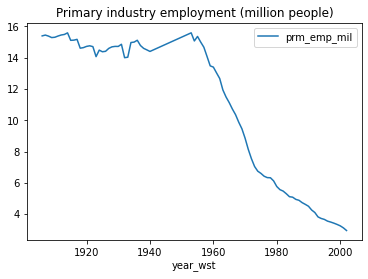

In [10]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'prm_emp_mil', ax = ax)
plt.title('Primary industry employment (million people)')
plt.show()

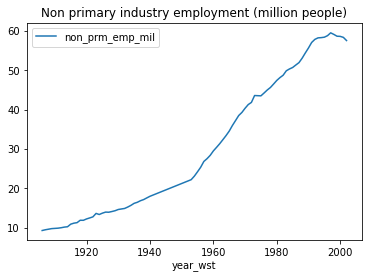

In [11]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'non_prm_emp_mil', ax = ax)
plt.title('Non primary industry employment (million people)')
plt.show()

In [12]:
df_pre = df_emp_pre_picked
df_post = df_emp_post_picked

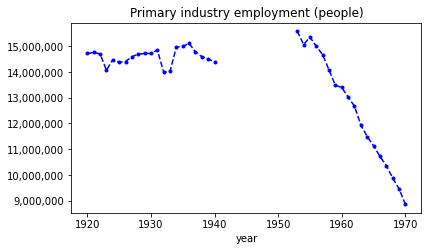

In [13]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
#df_pre.plot(x = 'year_wst', y = 'prm_cap_p90_bil', 
df_pre[df_pre.year_wst >= 1920].plot(x = 'year_wst', y = 'prm_emp', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#df_post.plot(x = 'year_wst', y = 'tot_cns_p90_mth',  
df_post[df_post.year_wst <= 1970].plot(x = 'year_wst', y = 'prm_emp',  
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#ax.set_rasterized(True)
ax.legend_.remove()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Primary industry employment (people)')
plt.savefig('../../Notes/comb_prm_emp.pdf')
plt.show()

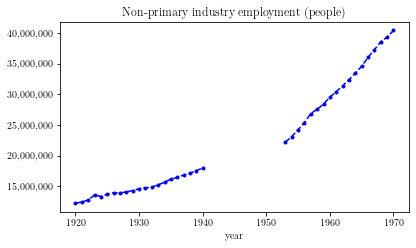

In [14]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
#df_pre.plot(x = 'year_wst', y = 'prm_cap_p90_bil', 
df_pre[df_pre.year_wst >= 1920].plot(x = 'year_wst', y = 'non_prm_emp', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#df_post.plot(x = 'year_wst', y = 'tot_cns_p90_mth',  
df_post[df_post.year_wst <= 1970].plot(x = 'year_wst', y = 'non_prm_emp',  
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#ax.set_rasterized(True)
ax.legend_.remove()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Non-primary industry employment (people)')
plt.savefig('../../Notes/comb_non_prm_emp.pdf')
plt.show()

In [15]:
df_post

,year_wst,prm_emp,non_prm_emp
0,1953,15590000,22220000
1,1954,15070000,23120000
2,1955,15360000,24230000
3,1956,15000000,25390000
4,1957,14670000,26860000
5,1958,14080000,27560000
6,1959,13480000,28410000
7,1960,13400000,29540000
8,1961,13030000,30440000
9,1962,12670000,31370000


In [16]:
df_emp_pre

,year_wst,prm_emp,scn_emp,trt_emp,mil,non_prm_emp
0,1906,15394100,4047900,5486400,246900,9287400
1,1907,15447500,4067600,5557400,149400,9475600
2,1908,15381000,4193300,5582500,154700,9621100
3,1909,15287700,4299200,5610600,141200,9768600
4,1910,15307700,4262000,5697100,133300,9825800
5,1911,15385700,4303300,5704800,126200,9881900
6,1912,15451700,4362400,5759200,124900,9996700
7,1913,15486500,4496300,5768500,110200,10154600
8,1914,15588600,4438100,5915900,109200,10244800
9,1915,15111900,4845500,6165800,113100,10898200


In [18]:
df_emp_post

,year_jpn,year_wst,pub_emp,prm_emp,scn_emp,trt_emp,non_prm_emp
0,28,1953,132,1559,952,1402,2222
1,29,1954,144,1507,981,1475,2312
2,30,1955,131,1536,997,1557,2423
3,31,1956,132,1500,1041,1630,2539
4,32,1957,128,1467,1120,1694,2686
5,33,1958,134,1408,1166,1724,2756
6,34,1959,146,1348,1187,1800,2841
7,35,1960,142,1340,1242,1854,2954
8,36,1961,150,1303,1323,1871,3044
9,37,1962,152,1267,1397,1892,3137
